# Practical session: Principal Component Analysis (PCA)

PCA (Principal Component Analysis) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining most of the important information. It's widely used for exploratory data analysis, visualization, and feature extraction.

In [14]:
## Importing Libraries 

# Base libraries 
import os 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualisation 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.decomposition import PCA

## Dataset

In [6]:
# Set the data path 
DATA_PATH="../data/temperature-AM/"
DATA_FILE="temperature.csv"
print(os.listdir(DATA_PATH))
# read the datafile
df = pd.read_csv(DATA_PATH + DATA_FILE)
# Dataset dimensions
print("dataset:", df.shape[0],"rows,", df.shape[1], "columns")

['Temperature.csv']
dataset: 3782 rows, 7 columns


## Transform predictors with PCA

- `n_components` specifies the desired number of dimensions after transformation.
- `fit` method learns the principal components from the data.
- `transform` method applies the learned transformation to reduce the data to the specified number of dimensions.

In [8]:
pca = PCA(n_components = 6)
principalComponents = pca.fit_transform(df.loc[:,'BCDrop_R2_C0':'XOverEWMARow1_R4_C0'])
df_pc = pd.DataFrame(data = principalComponents)

In [9]:
# Adding the target variable for visualization
#principalDf.insert(6, "class", df["class"].tolist())
df_pc['class'] = df['class']
df_pc.head()

,0,1,2,3,4,5,class
0,5.642845,2.001652,-2.727778,-1.019293,-0.059228,-0.030555,1
1,6.197028,1.628574,-3.071718,-0.868744,0.261986,0.134580,1
2,5.933511,1.772425,-2.792895,-0.887863,-0.126838,0.093556,1
3,5.731871,2.175717,-2.416712,-0.813661,-0.353666,0.081411,1
4,4.811648,1.876573,-1.356946,-1.035807,-0.999902,-0.178852,1


## Explained variance

In [12]:
# Explained variance per component
pca.explained_variance_ratio_

array([0.47474475, 0.32726413, 0.0899885 , 0.06160547, 0.03282821,
       0.01356893])

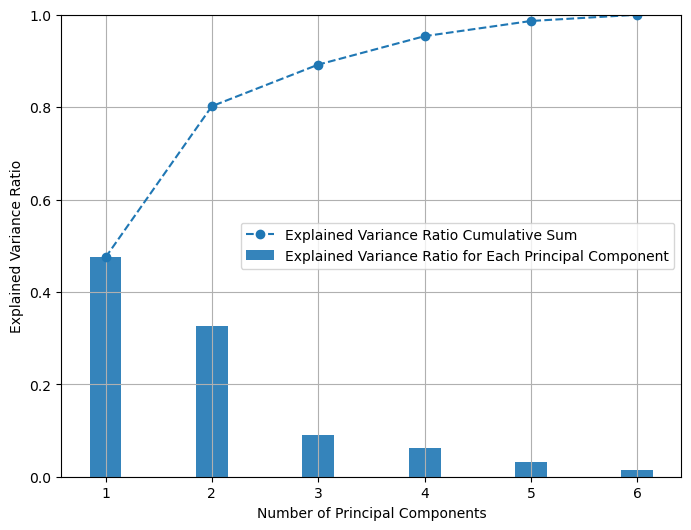

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center', alpha=0.9, width=0.3)
plt.legend(['Explained Variance Ratio Cumulative Sum', 'Explained Variance Ratio for Each Principal Component'])
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
# Set y-axis limits
plt.ylim(0, 1)
plt.grid(True)
plt.show()

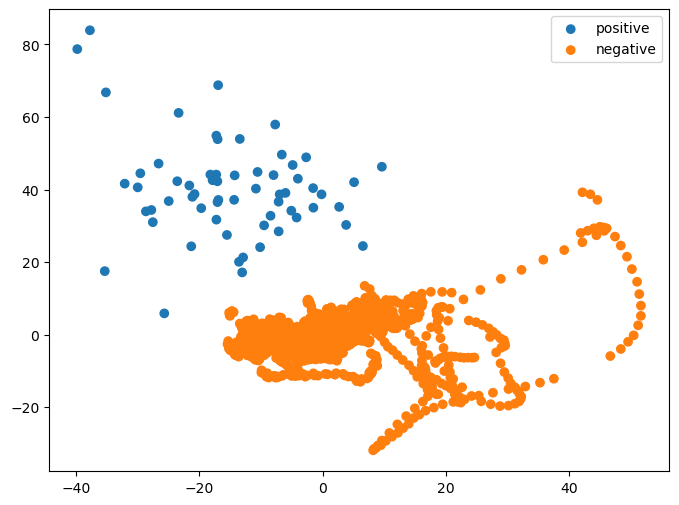

In [25]:
groups = df_pc.groupby('class')
plt.figure(figsize=(8,6))
for name, group in groups:
    plt.scatter(group[0], group[1], marker='o', linestyle='', label=name)
plt.legend(["positive","negative"])